<a id="top"></a>
# UV Excess in Low Mass Stars - SOLUTION
***

Solution proposed for the exercise in the tutorial.

## Imports

The first step will be to import the libraries we will be using throughout this tutorial: 

- `pyvo` to access the Virtual Observatory.
- `astropy` to handle celestial coordinates, units, and tables.
- `warnings` to manage warning messages
- `numpy` to work with arrays.
- `astroquery` to query the SIMBAD & Vizier catalogs.
- `matplotlib.pyplot` to plot the results.

In [2]:
import pyvo as vo
import astropy.units as u
import astropy.coordinates as coord
from astropy.table import Table
import warnings
warnings.simplefilter('ignore')  
import numpy as np
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt

## Data needed to create the color-color plot

Data arrays obtained in the tutorial that will be used in the solutions of the exercise:

### TWA

In [6]:
names_TWA, ra_TWA, dec_TWA = np.loadtxt('TWA_coordinates_complete.txt', unpack = True, dtype="U7,f8,f8")

# GALEX

n = len(names_TWA)
nuv_TWA = np.zeros(n)

for i in range(n):
    pos = coord.SkyCoord(ra=ra_TWA[i], dec=dec_TWA[i], unit='deg',frame='icrs')
    size = u.Quantity(10, unit="arcsec")
    scs_service = vo.dal.SCSService('http://gsss.stsci.edu/webservices/vo/ConeSearch.aspx?CAT=GALEX&')
    scs_results = scs_service.search(pos=pos, radius=size)
    if (len(scs_results['nuv_mag']) > 0):
        nuv_TWA[i] = float(scs_results['nuv_mag'][0])
        
# SIMBAD

Simbad.add_votable_fields('flux(K)','flux(V)')
n = len(names_TWA)
magK_TWA = []
magV_TWA = []
missing_val_i = []

for i in range(n):
    table = Simbad.query_object(names_TWA[i])
    if (float(table['FLUX_V']) != float(table['FLUX_V'])):
        missing_val_i.append(i)
        magK_TWA.append(float(table['FLUX_K']))
        magV_TWA.append(0)
        continue
    else:
        magK_TWA.append(float(table['FLUX_K']))
        magV_TWA.append(float(table['FLUX_V']))
magK_TWA = np.array(magK_TWA)
magV_TWA = np.array(magV_TWA)

# Match queries

matched_i = []

for i in range(len(names_TWA)):
    if (nuv_TWA[i] != 0.) & (i not in missing_val_i):
        matched_i.append(i)

### M-dwarf sample

In [7]:
# VizieR

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs("J/AJ/161/63/table3")
winters2021 = catalogs[0]

V_w21 = []
K_w21 = []
ra_w21 = []
dec_w21 = []

for i in range(len(winters2021)):
    if str(winters2021[i]['Vmag'])!='--' and str(winters2021[i]['Kmag'])!='--':
        V_w21.append(float(winters2021[i]['Vmag']))
        K_w21.append(float(winters2021[i]['Kmag']))
        ra_w21.append(winters2021[i]['RAJ2000'])
        dec_w21.append(winters2021[i]['DEJ2000'])

V_w21 = np.array(V_w21)
K_w21 = np.array(K_w21)
ra_w21 = np.array(ra_w21)
dec_w21 = np.array(dec_w21)

# GALEX

nuv_w21 = []
keep_i_w21 = []

for i in range(len(ra_w21)):
    ra1 = ra_w21[i].split()
    dec1 = dec_w21[i].split()
    pos = coord.SkyCoord(ra=ra1[0]+'h'+ra1[1]+'m'+ra1[2]+'s', dec=dec1[0]+'d'+dec1[1]+'m'+dec1[2]+'s',frame='fk5')
    size = u.Quantity(10, unit="arcsec")
    scs_service = vo.dal.SCSService('http://gsss.stsci.edu/webservices/vo/ConeSearch.aspx?CAT=GALEX&')
    scs_results = scs_service.search(pos=pos, radius=size)
    if str(scs_results['nuv_mag'])!='[]' and scs_results['nuv_mag'][0]!=-999.0:
        keep_i_w21.append(i)
        nuv_w21.append(float(scs_results['nuv_mag'][0]))
    
nuv_w21 = np.array(nuv_w21)

## Exercises

Now try to re-create the steps we followed in this tutorial for the TW Hya star, from which the TW Hydrae association gets its name. The ICRS coordinates (ep = J2000) of TW Hya are, according to SIMBAD:

- RA: 165.4662722021100 deg
- DEC: -34.7047314495500 deg

### 1. GALEX query

Use the coordinates of TW Hya to find the NUV magnitude in GALEX for the source, as we did before.

In [3]:
pos = coord.SkyCoord(ra=165.4662722021100, dec=-34.7047314495500, unit='deg',frame='icrs')
size = u.Quantity(10, unit="arcsec")
scs_service = vo.dal.SCSService('http://gsss.stsci.edu/webservices/vo/ConeSearch.aspx?CAT=GALEX&')
scs_results = scs_service.search(pos=pos, radius=size)
if (len(scs_results['nuv_mag']) > 0):
    nuv_TWHya = float(scs_results['nuv_mag'][0])
    
print('NUV magnitude of TW Hya: ',nuv_TWHya)

NUV magnitude of TW Hya:  14.356100082397461


## 2. SIMBAD query

Now, using either the name or the coordinates of the source, look it up in SIMBAD database and retrieve its K and V magnitudes.

In [4]:
Simbad.add_votable_fields('flux(K)','flux(V)')
table = Simbad.query_object('TW Hya')
magK_TWHya = float(table['FLUX_K'])
magV_TWHya = float(table['FLUX_V'])

print('K magnitude of TW Hya: ',magK_TWHya)
print('V magnitude of TW Hya: ',magV_TWHya)

K magnitude of TW Hya:  7.296999931335449
V magnitude of TW Hya:  10.5


### 3. Include TW Hya in color-color diagram

Finally, include in the color-color diagram that we created before, make sure to use a different marker and/or color to differentiate it from the rest of the sources!

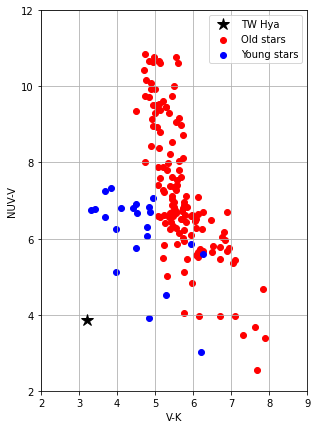

In [11]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.scatter(V_w21[keep_i_w21]-K_w21[keep_i_w21],nuv_w21-V_w21[keep_i_w21],c='r',label='Old stars')
plt.scatter(magV_TWA[matched_i]-magK_TWA[matched_i],nuv_TWA[matched_i]-magV_TWA[matched_i],c='b',label='Young stars')
plt.plot(magV_TWHya-magK_TWHya,nuv_TWHya-magV_TWHya,'*',c='k',markersize=12,label='TW Hya')
plt.ylabel('NUV-V')
plt.xlabel('V-K')
plt.xlim([2,9])
plt.ylim([2,12])
ax.set_aspect('equal')
plt.legend(loc='best')
plt.grid()
plt.show()

As mentioned in the introduction, TW Hya has a substantial NUV excess, in particular in the $NUV-J$ color, with a $NUV-J \sim 6$ while the rests of the stars in the association have a value around $\sim 9-11$. The most probable emission source to explain this excess, apart from its youth, is continuous accretion onto the star, in addition to the disk being face on, causing the accretion to be unobscured. For more information about this topic, please refer to <a href="https://ui.adsabs.harvard.edu/abs/2011ApJ...727...62R/abstract">Rodriguez et al. 2011.</a>

## Additional Resources

* [GALEX Mission Overview](https://asd.gsfc.nasa.gov/archive/galex/Documents/MissionOverview.html)
* <a href="https://mast.stsci.edu/api/v0/index.html">MAST API</a> 
* [GALEX UV Unique Source Catalog](https://archive.stsci.edu/hlsp/guvcat)
* <a href="https://pyvo.readthedocs.io/en/latest/index.html">PyVO documentation</a> <br> 
    
## About this Notebook

**Author**: Clara Puerto Sánchez <br>
**Keyword(s)**: Tutorial, UV excess, M-dwarfs <br>
**Last Updated**: Aug 2022 <br>
**Next review**: Mar 2023

For support, please contact the Archive HelpDesk at archive@stsci.edu.
***
[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>